# Homework set 6

Before you turn this problem in, make sure everything runs as expected (in the menubar, select Kernel → Restart Kernel and Run All Cells...).

Please **submit this Jupyter notebook through Canvas** no later than **Mon Dec. 11, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Pablo Rodriguez Alves - 15310191
Nitai Nijholt - 12709018

# About imports
Please import the needed packages by yourself.

In [19]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time

# Exercise 1
N.B.1 tentative points for each part are: 2+1.5+2+2+1.5 (and one point for free gives 10).

N.B.2 you are to implement the methods yourself.

Given a function $f$, let $T(f,a,b,m)$ denote the composite trapezoid rule with $m$ subintervals over the interval $[a,b]$. 
## (a)
Approximate the integral of $x^{-3}$ over $[a,b] = [ \frac{1}{10}, 100 ]$ by the composite trapezoid rule $T(f,a,b,m)$ for $m = 2^k$. Find the smallest $k$ such that the exact error is less than $\epsilon = 10^{-3}$. Explain the slow convergence.

Let $f(x) = x^{-3}$

Then the integral of $f(x)$ is $F(X) = \frac{-1}{2x^{2}}$




In [20]:
# Define our function of interest and its integral
def func(x):
    return x**-3

def F(x):
    return -1/(2*x**2)

In [21]:
def T(func,a,b,m):
    "Heath p. 354"

    # Compute number of points: one more than subintervals
    p = m+1

    # Calculate the width of each trapezoid
    h = (b-a)/(p)
    
    # Evaluate the function at the first point (a) and multiply by 0.5
    first_eval = 0.5 * func(a)
    
    # Evaluate the function at the last point (b) and multiply by 0.5
    last_eval = 0.5 * func(b)
    
    # Initialize cumulative sum of function evaluations with first and last evaluations
    cummulative_evals = first_eval + last_eval

    # Loop over each subinterval excluding the endpoints
    for j in range(1, p-2):
        # Calculate the x-coordinate for the j-th trapezoid's top edge
        x_j = a + j * h
        
        # Add the function value at x_j to the cumulative sum
        cummulative_evals += func(x_j)

    # Multiply the cumulative sum by the width of the trapezoids to get the final integral approximation
    return h * cummulative_evals

In [4]:
# parameters
a = 1/10
b = 100
epsilon = 1/100

# Get real value of the integral first
real_value = F(b) - F(a)
print('real_value', real_value)

# Loop over values of k
for k in range(3,30):

    # Get number of subintervals for current k
    m = 2**k

    # Compute the approximation and its error
    I_trap = np.array([T(func,a,b,m)])
    err_trap = np.abs(real_value - I_trap)

    # Print values to check evolution
    print('k',k,'I_trap',I_trap,'Error_trap',err_trap)

    # Check if our error is smaller than the tolerance
    if err_trap < epsilon:
        print('<',epsilon)
        print('Done!, k =',k)
        break

real_value 49.99994999999999
k 3 I_trap [5550.00943311] Error_trap [5500.00948311]
k 4 I_trap [2938.26848819] Error_trap [2888.26853819]
k 5 I_trap [1513.75647178] Error_trap [1463.75652178]
k 6 I_trap [768.89100278] Error_trap [718.89105278]
k 7 I_trap [388.6568728] Error_trap [338.6569228]
k 8 I_trap [198.68541397] Error_trap [148.68546397]
k 9 I_trap [108.04895499] Error_trap [58.04900499]
k 10 I_trap [69.34160828] Error_trap [19.34165828]
k 11 I_trap [55.5533005] Error_trap [5.5533505]
k 12 I_trap [51.45849196] Error_trap [1.45854196]
k 13 I_trap [50.36982817] Error_trap [0.36987817]
k 14 I_trap [50.09277] Error_trap [0.09282]
k 15 I_trap [50.02317791] Error_trap [0.02322791]
k 16 I_trap [50.0057585] Error_trap [0.0058085]
< 0.01
Done!, k = 16


**Answer**

Convergence was obtained for $k=16$, which entails a total of $m=2^{16}=65536$ subintervals, which is a high number considering our interval has a length of barely $100$ and the tolerance used, $1/100$, was very high. This slow convergence ban be explained. Firstly, values that have the highest influence on the integration result are near $a$, the left extreme of the interval, with our function sharply decreasing for the entire interval, having $f(a)\approx 1000$ and $f(b)=10^{-6}$. Because this method always divides the interval evenly, it is specially slow to converge for functions like this one, that have most of its important values in the extremes, for it has to create many subintervals before getting enough points in that region. In short, all points on the right side of the interval evaluate to approximately $0$ and thus have a minimal contribution to the result. The following two plots illustrate this fact:

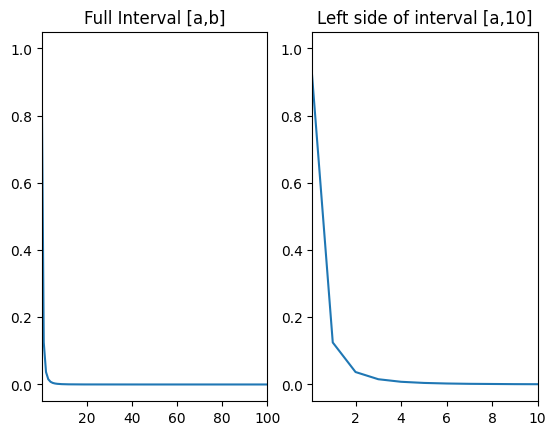

In [28]:
# Plot f(x)=1/x**3
y = [func(x) for x in range(1,1000)]

plt.subplot(1, 2, 1)
plt.title('Full Interval [a,b]')
plt.plot(y)
plt.xlim([a,b])

plt.subplot(1, 2, 2)
plt.title('Left side of interval [a,10]')
plt.plot(y)
plt.xlim([a,10])
plt.show()


## (b)

To improve the convergence rate of the above problem, we may use an adaptive strategy, as discussed in the book and the lecture. Consider the following formulas for approximate integration
$$\begin{aligned}
I_1(f,a,b) = {}& T(f,a,b,1) \\
I_2(f,a,b) = {}& T(f,a,b,2) .
\end{aligned}$$
Show, based on the error estimates for the trapezoid rule using the Taylor series (book example 8.2) that the error in $I_2$ can be estimated by a formula of the form 
$$E_2 = C (I_1 - I_2)$$
and determine the constant $C$ (if you can't find $C$, you may take $C = 0.5$).

Let the error estimate for the trapezoid rule using the Taylor series (see Heath p.347):

$E_2 = \frac{T(f)-M(f)}{3}$

Where

$T(f) = \frac{b-a}{2} \cdot (f(a)+f(b)) $

$M(f) = (b-a) \cdot f(\frac{a+b}{2}) = (b-a) \cdot f(m) $

In our case

$I_1 = \frac{(b-a)}{2}\cdot(f(a)+f(b))$

$I_2 = \frac{(b-a)}{2}\cdot(\frac{f(a)}{2}+f(m)+\frac{f(b)}{2})$

This means that

$T(f) = I_1$

$2I_2 - I_1  = \frac{(b-a)}{2}\cdot(f(a)+2 f(m)+f(b)) - \frac{(b-a)}{2}\cdot(f(a)+f(b)) = $

$ 2I_2 - I_1  =\frac{(b-a)}{2}(2f(m)) = (b-a) \cdot f(m) = M(f)$

yielding $M(f) = 2I_2-I_1$

Therefore

$E_2 = \frac{I_1-(2I_2-I_1)}{3}= \frac{I_1-2I_2+I_1)}{3} = \frac{2}{3}(I_1-I_2)$ 

This means that

$\frac{2}{3}(I_1-I_2)= C \cdot (I_1-I_2)$

$\therefore C = \frac{2}{3}$

$\blacksquare$


## (c)
An adaptive strategy for computing the integral on an interval $[a,b]$ now is: Compute $I_2$ and $E_2$, and accept $I_2$ as an approximation when the estimated error $E_2$ is less or equal than a desired tolerance $\epsilon$.  Otherwise, apply the procedure to 
$\int_a^{\frac{b+a}{2}} f(x) \, dx$ and $\int_{\frac{b+a}{2}}^b f(x) \, dx$ with tolerances $\frac{\epsilon}{2}$.

Write a recursive python routine that implements the adaptive strategy.

Then apply this routine to the function $x^{-3}$ with $a, b, \epsilon$ as before. What is the exact error in the obtained approximation? 

In [33]:
C = 2/3

def recursive_integral(f,a,b,tolerance):
    # Using the algorithm in (c)
    I1 = ((b-a)/2) * (f(a) + f(b))
    I2 = ((b-a)/2) * (f(a)/2 + f((a+b)/2) + f(b)/2)

    # Using the formula from (b)
    E2 = C *  np.abs(I1-I2)

    if E2 < tolerance:
        return I2
    else:
        return recursive_integral(f,a,(a+b)/2,tolerance/2) + recursive_integral(f,(a+b)/2,b,tolerance/2)

In [34]:
a = 1/10
b = 100
epsilon = 1/100

value = recursive_integral(func,a,b,epsilon)
exact_error = np.abs(real_value - value)

print('Value:',value)
print('Exact error:',exact_error)

Value: 50.00070251899303
Exact error: 0.0007525189930390752


## (d)
Modify the code of (c) so that the number of function evaluations is counted and that no unnecessary function evaluations are performed. Compare the number of function evaluations used in the adaptive strategy of (c) with the result of (a). 
(*Hint*: To count the number of function evaluations, you may use a global variable that is incremented by the function each time it is called.)

In [35]:
# Define the global variable
FUNCTION_CALLS = 0

# Update the function by letting it know that the variable 
# FUNCTION_CALLS refers to the global variable (to update it)
def func(x):
    global FUNCTION_CALLS
    FUNCTION_CALLS += 1
    return x**-3

In [36]:
# Optimize the integral function
def recursive_integral_optimized(f,a,b,tolerance,f_a,f_b):
    # Optimization 1: Set f(a) and f(b) as function parameters 
    f_a = f_a
    f_b = f_b

    # Optimization 2: Only compute f(m) for each call
    f_m = f((a+b)/2)

    # Using the algorithm (c)
    I1 = ((b-a)/2) * (f_a + f_b)
    I2 = ((b-a)/2) * (f_a/2 + f_m + f_b/2)

    # Using the formula from (b)
    E2 = C *  np.abs(I1-I2)

    if np.abs(E2) < tolerance:
        return I2
    else:
        # Send the f_m to next iterations
        return recursive_integral_optimized(f,a,(a+b)/2,tolerance/2,f_a,f_m) + recursive_integral_optimized(f,(a+b)/2,b,tolerance/2,f_m,f_b)

In [37]:
a = 1/10
b = 100
epsilon = 1/100

# Reset counter
FUNCTION_CALLS = 0

# First count calls to original function
start_time = time.perf_counter()
value = recursive_integral(func,a,b,epsilon)
time_1 = time.perf_counter() - start_time

exact_error = np.abs(real_value - value)
calls = FUNCTION_CALLS


# Reset counter
FUNCTION_CALLS = 0

# Call the new function
start_time = time.perf_counter()
value2 = recursive_integral_optimized(func,a,b,epsilon,func(a),func(b))
time_2 = time.perf_counter() - start_time

exact_error2 = np.abs(real_value - value2)
calls2 = FUNCTION_CALLS

print('Original function calls:', calls)
print('Optimized function calls:', calls2)
print()
print('Fraction of calls required:',round(calls2/calls,3))
print('Calls saved:',calls-calls2)
print()
print('Original function time:',round(time_1,4),'[s]')
print('Optimized function time:',round(time_2,4),'[s]')
print()
print('Fraction of time required:',round(time_2/time_1,3))
print('Time saved:',time_1-time_2, '[s]')
print()
print('Values still the same?',value == value2)
print('Errors still the same?',exact_error == exact_error2)


Original function calls: 21295
Optimized function calls: 4261

Fraction of calls required: 0.2
Calls saved: 17034

Original function time: 0.0848 [s]
Optimized function time: 0.0748 [s]

Fraction of time required: 0.881
Time saved: 0.010091000000102213 [s]

Values still the same? True
Errors still the same? True


**Answer**

With our optimizations, our function now also receives $f(a)$ and $f(b)$ as parameters and each call only has to compute $f(m)$. In this way, by storing calculations that have been done (which do not need to be computed again) we can save on function evaluations. These improvements now allow us to produce the same results of with one fifth of calls (5327 vs. 26625) and in around 40 to 65 \% of the original time. These improvements are huge, specially considering that the code complexity has barely increased, thanks to recursiveness. In short, the adaptive strategy of (c) is preferable to the original result of (a), as this method finally allows to focus the subintervals in the left side of the $[a,b]$ interval which, as already shown, contains all important contributions to the integral result. In this way, the algorithm can adapt to our function, converging for its right side fast to then focus exclusively on the left side.

## (e)
In the course of executing the recursive procedure, some subintervals are refined (split in two subintervals) while others aren't as a result of the choices made by the algorithm. It turns out that the choices made by this algorithm are not always optimal. Other algorithms, that decide in a different way which subinterval needs to be refined, may be more efficient in the sense that they require less function evaluations (while using the same formulas for the approximate integral and the approximate error associated with a subinterval).

Can you explain why this is the case? Discuss briefly possible alternative approaches.




**Answer**

At a high level, these alternative approaches test assumptions of the function we are integrating inside the integration algorithm and use that information to make smarter subinterval refinement decisions. Importantly, these additional steps, which are then introduced to reduce function evaluations, are expected to themselves cost computational resources, potentially increasing the final computation times and thus motivating a compromise between the complexity of the algorithm and its use cases. With this is mind is easy to see that our method is simple, as it only evaluates the original function $f(x)$ at certain points that are progresively subdivided with the same rate. For this reason, it cannot easily adapt to functions that may have certain subregions with a rapidly changing behavior (for which it would be better to refine them with more subintervals) but instead, risks doing unnecessary refinements in other regions, contributing to more function evaluations. For this reason, a possible approach would be to keep track of the rate of change, and take this rate of change into consideration when deciding which intervals to further refine. Also, as our current model only compares the error with $\epsilon$ in order to decide whether to refine or not the interval, always refining it in the same way no matter how big the error is, another approach would be to keep track of the error estimates, refining the subintervals (and thus the number of calls) in accordance with the error size.